In [2]:
import pandas as pd

In [3]:
data_frame = pd.read_csv('datasets/S&P500_EOD-Price.csv')
data_frame = data_frame.dropna(axis=1)

In [4]:
data_frame.head()

,Date,APA,MTCH,GEN,DXC,EG,BKR,AMD,HON,BALL,...,SNPS,SWKS,ZION,TTWO,VRTX,TRMB,ZBRA,LNT,BBWI,WBA
0,2000-01-03,14.772727,7.527071,7.109375,46.327873,21.8750,20.2500,15.500,54.044136,2.488281,...,32.781250,31.406250,55.5000,9.125000,18.78125,4.145833,25.027779,13.40625,16.395514,28.5625
1,2000-01-04,14.123377,6.921444,6.781250,46.017365,21.8125,20.2500,14.625,53.090767,2.406250,...,30.437500,29.562500,52.8125,8.875000,17.28125,4.072917,24.666668,13.40625,16.067099,27.5000
2,2000-01-05,14.529221,6.661890,6.375000,42.788074,23.2500,20.3750,15.000,52.375736,2.449219,...,30.703125,30.328125,52.7500,8.833333,17.00000,3.817708,25.138889,14.06250,15.839733,27.8125
3,2000-01-06,15.909091,6.938748,6.007813,43.409092,24.3125,22.3125,16.000,53.388695,2.488281,...,28.468750,27.375000,53.5000,8.750000,16.75000,3.854167,23.777779,14.06250,15.587106,27.0000
4,2000-01-07,15.854978,6.904141,6.484375,43.315941,25.6250,23.8125,16.250,56.248802,2.417969,...,28.750000,30.187500,53.6250,9.000000,18.21875,3.854167,23.513889,14.25000,15.688157,27.6875


In [6]:
data_frame['Date'] = pd.to_datetime(data_frame['Date'])
data_frame['Year'] = data_frame['Date'].dt.year

grouped = data_frame.groupby('Year')
annual_returns_dict = {}

for column in data_frame.columns[1:]:
    annual_returns = []
    for year, group in grouped:
        start_value = group.iloc[0][column]
        end_value = group.iloc[-1][column]
        annual_return = ((end_value - start_value) / start_value) * 100
        annual_returns.append(annual_return)
    annual_returns_dict[column] = annual_returns

In [7]:
annual_returns_df = pd.DataFrame(annual_returns_dict)
annual_returns_df['Mean Annual Return'] = annual_returns_df.mean(axis=1)

annual_returns_df.head()

ranked_portfolios = annual_returns_df.sort_values(by='Mean Annual Return', ascending=False)
ranked_portfolios['Rank'] = range(1, len(ranked_portfolios) + 1)
ranked_portfolios.drop('Year', axis=1, inplace=True)

ranked_portfolios.head()

,APA,MTCH,GEN,DXC,EG,BKR,AMD,HON,BALL,REG,...,ZION,TTWO,VRTX,TRMB,ZBRA,LNT,BBWI,WBA,Mean Annual Return,Rank
3,43.600340,39.572178,61.668229,26.191153,51.071425,-3.654886,112.553495,33.827065,12.587413,22.804304,...,50.935043,23.956987,-36.735945,184.491950,69.599663,46.556798,28.785715,20.863791,39.556060,1
9,30.166535,27.284043,20.878372,55.067382,11.941467,17.914354,306.722689,13.098670,20.822622,-20.426690,...,-48.680000,26.415094,39.622016,13.004484,34.807412,1.919838,79.310340,43.718209,31.148203,2
13,6.440431,46.063841,20.923077,34.650608,40.170863,31.165432,52.964427,41.111966,12.182410,-2.587839,...,36.243743,51.306629,70.217639,12.808846,32.031258,14.311028,30.485234,50.919594,31.027403,3
21,82.058219,-11.786285,25.084256,24.189811,20.082422,14.462412,55.904647,0.269295,7.252668,70.205552,...,47.123224,-11.954424,-4.284526,31.528135,57.406184,21.746878,118.005624,25.990332,30.546192,4
19,-5.606791,93.747048,34.741281,-31.014868,29.570341,21.757721,143.547536,34.263823,44.772780,11.054390,...,24.867714,17.709833,33.441001,28.395435,63.492060,32.976910,-31.128845,-13.345094,28.436185,5


c:\users\cigan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


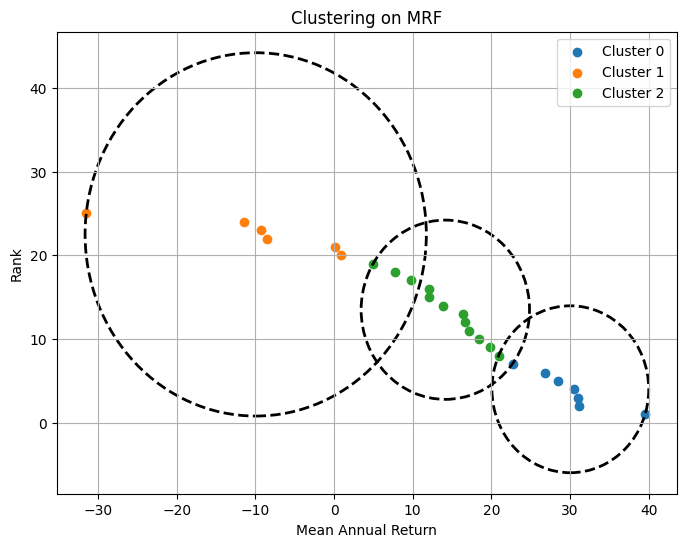

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

features = ranked_portfolios[['Mean Annual Return', 'Rank']].values
kmeans = KMeans(n_clusters=3) 
kmeans.fit(features)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
ranked_portfolios['Cluster'] = labels
plt.figure(figsize=(8, 6))

for cluster_label in range(3):  
    cluster_data = ranked_portfolios[ranked_portfolios['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Mean Annual Return'], cluster_data['Rank'], label=f'Cluster {cluster_label}')

for i in range(len(centers)):
    cluster_data = ranked_portfolios[ranked_portfolios['Cluster'] == i][['Mean Annual Return', 'Rank']]
    radius = np.max(np.linalg.norm(cluster_data.values - centers[i], axis=1))
    circle = plt.Circle(centers[i], radius, color='black', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle)

plt.xlabel('Mean Annual Return')
plt.ylabel('Rank')
plt.title('Clustering on MRF')
plt.legend()
plt.grid(True)
plt.show()